## Tools

In this workshop we use pandas, sklearn and OpenCV, the following cells show some methods that we will use

[Pandas](https://pandas.pydata.org/)

It is a very useful library to work with tabular data.
It is very common to find it in the analysis of data and in Machine Learning processes.
In this workshop we will use it to upload a CSV file and explore the data.

In [1]:
# https://pandas.pydata.org/ 
import pandas as pd

# load csv file
data_frame = pd.read_csv('./data/hands_signs.csv')

In [2]:
data_frame.describe()

,letter,path
count,10000,10000
unique,24,10000
top,R,./data/sign-language-mnist/N/9586.jpg
freq,475,1


In [3]:
data_frame.sample(frac=0.0002)

,letter,path
4281,U,./data/sign-language-mnist/U/12134.jpg
2577,Y,./data/sign-language-mnist/Y/5043.jpg


[sklearn](http://scikit-learn.org/stable/) is one of the most popular Machine Learning libraries.
In this notebook we will use two of its functions, `train_test_split` and` LabelEncoder` to process the
data before training neural networks in tensorflow.

In [4]:
from sklearn.model_selection import train_test_split

x = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
y = [1  ,  2 ,  3 ,  3 ,  4 ,  5 ,  7 ,  8 ]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [5]:
print("x_train:", x_train)
print("y_train:", y_train)
print("x_test:", x_test)
print("y_test:", y_test)


x_train: ['a', 'd', 'h', 'e']
y_train: [1, 3, 8, 4]
x_test: ['f', 'g', 'b', 'c']
y_test: [5, 7, 2, 3]


In [6]:
from sklearn.preprocessing import LabelEncoder
y = ['a', 'a', 'a', 'b', 'b', 'd', 'e', 'f', 'h', 'h']

y_label = LabelEncoder().fit_transform(y)
print(y)
print(y_label)

['a', 'a', 'a', 'b', 'b', 'd', 'e', 'f', 'h', 'h']
[0 0 0 1 1 2 3 4 5 5]


[OpenCV](https://opencv.org/) is a computer vision library, in this workshop we will use it to load images and make color space changes for example RGB to grayscale.


In [7]:
import cv2

image = cv2.imread("./data/sign-language-mnist/R/5570.jpg")
print(image.shape)

(28, 28, 3)


In [8]:
image

array([[[149, 149, 149],
        [152, 152, 152],
        [157, 157, 157],
        ...,
        [154, 154, 154],
        [152, 152, 152],
        [151, 151, 151]],

       [[151, 151, 151],
        [155, 155, 155],
        [160, 160, 160],
        ...,
        [157, 157, 157],
        [155, 155, 155],
        [154, 154, 154]],

       [[154, 154, 154],
        [158, 158, 158],
        [163, 163, 163],
        ...,
        [160, 160, 160],
        [159, 159, 159],
        [158, 158, 158]],

       ...,

       [[188, 188, 188],
        [181, 181, 181],
        [205, 205, 205],
        ...,
        [210, 210, 210],
        [208, 208, 208],
        [206, 206, 206]],

       [[197, 197, 197],
        [191, 191, 191],
        [214, 214, 214],
        ...,
        [210, 210, 210],
        [208, 208, 208],
        [206, 206, 206]],

       [[192, 192, 192],
        [200, 200, 200],
        [207, 207, 207],
        ...,
        [210, 210, 210],
        [208, 208, 208],
        [206, 206, 206]]

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

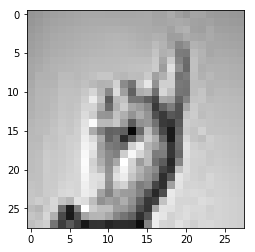

In [10]:
plt.imshow(image)

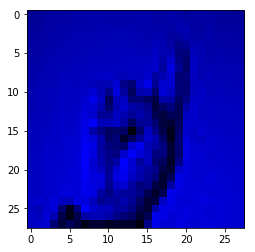

In [11]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(image_hsv)

In [12]:
image_hsv

array([[[  0,   0, 149],
        [  0,   0, 152],
        [  0,   0, 157],
        ...,
        [  0,   0, 154],
        [  0,   0, 152],
        [  0,   0, 151]],

       [[  0,   0, 151],
        [  0,   0, 155],
        [  0,   0, 160],
        ...,
        [  0,   0, 157],
        [  0,   0, 155],
        [  0,   0, 154]],

       [[  0,   0, 154],
        [  0,   0, 158],
        [  0,   0, 163],
        ...,
        [  0,   0, 160],
        [  0,   0, 159],
        [  0,   0, 158]],

       ...,

       [[  0,   0, 188],
        [  0,   0, 181],
        [  0,   0, 205],
        ...,
        [  0,   0, 210],
        [  0,   0, 208],
        [  0,   0, 206]],

       [[  0,   0, 197],
        [  0,   0, 191],
        [  0,   0, 214],
        ...,
        [  0,   0, 210],
        [  0,   0, 208],
        [  0,   0, 206]],

       [[  0,   0, 192],
        [  0,   0, 200],
        [  0,   0, 207],
        ...,
        [  0,   0, 210],
        [  0,   0, 208],
        [  0,   0, 206]]

## Tensorflow

[Tensorflow](https://www.tensorflow.org/) is a machine learning library that makes use of graph structures to perform its calculations and compute the results of its operations. In the next cells of this notebook will be shown in a general way how operations are carried out with this learning library.

In [13]:
# Import NumPy y TensorFlow
import numpy as np
import tensorflow as tf

<table>
<tr>
<td><p>
The image below represents the nodes that tensorflow generates after declaring, initializing variables and activating the operations of the next cell.<p>
<p> \* In Tensorflow the variables, constants, operations, etc. are declared first, or a method that does this work is called and returns an operation or variable that contains the result.</p>
<p> \* After having the defined operations, a session is created, the variables are initialized and the calculation of the operations are performed with the `sess.run (op)` method of the session object.</p>
</td>
<td><img src="images/graph1.png" height="420px"></td>
</tr>
</table>
<table>
<tr>
    <td>
    <img src="images/graphnetwork.png" width="620px"></td>
    <td>
</tr>
</table>

In [ ]:
tf.reset_default_graph()

a_1 = tf.Variable(np.array([1,2,3], dtype=np.float32), name="variable_a1")
a_2 = tf.get_variable("variable_a2", initializer=3.32)

b = tf.constant([[0,1], [2, 3]], name="Matrix_B")
c = tf.zeros([2, 3], tf.int32) * 1
d = tf.ones_like(c)
e = tf.lin_space(10.0, 13.0, 4, name="linea")
op = tf.add(b, 25)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("variable a1, arreglo numpy\n", sess.run(a_1))
    print("variable a2, varible numérica\n", sess.run(a_2))
    print("constante matrix numpy\n", sess.run(b))
    print("genera matriz de ceros de dimensión 2x3\n", sess.run(c))
    print("genera matriz de unos con la dimensión de c\n", sess.run(d))
    print("genera secuencia de números\n", sess.run(e))
    print("corre operación op = b + 25\n", sess.run(op))

In [ ]:
# restart the graph
None
# create a variable result = 0
result = 0
# declare two constants of tensorflow with positive values
# create a adition operation between the two constants
None
# in a tensorflow session execute the addition operation and
# save the result in the result variable
None
# Print result

assert (result > 0), "The result must be greater than zero"

#### Networks in TensorFlow

In the next cells we will see how to implement the network shown in the following image using tensorflow.


<img src="images/ANN-Diagram.png" width="500px">
source: [viasat.com](https://techblog.viasat.com/using-artificial-neural-networks-to-analyze-trends-of-a-global-aircraft-fleet/)

Layer 1
$$ X(input) = \begin{bmatrix}
    . \\
    . \\
    . \\
    . 
\end{bmatrix}_{(4rows, 1columns)} \;\;\; W1 = \begin{bmatrix}
    . . . . .\\
    . . . . .\\
    . . . . .\\
    . . . . .
\end{bmatrix}_{(4rows, 5columns)}\;\;\;  b1 =\begin{bmatrix}
    .  \\
    .  \\
    .  \\
    .  \\
    .
\end{bmatrix}\;\;\;  Z1 =\begin{bmatrix}
    .  \\
    .  \\
    .  \\
    .  \\
    .
\end{bmatrix}\;\;\;  A1 = ReLu(Z1) = \begin{bmatrix}
    .  \\
    .  \\
    .  \\
    .  \\
    .
\end{bmatrix}\tag{layer 1}$$

$$ Z1 = W1^T X + b1 \; \; \; $$
$$ A1 = ReLu(Z1) $$

Layer 2
$$ A1(input) = \begin{bmatrix}
    . \\
    . \\
    . \\
    . \\
    . 
\end{bmatrix} \;\;\; W2 = \begin{bmatrix}
    . . . . . . .\\
    . . . . . . .\\
    . . . . . . .\\
    . . . . . . .\\
    . . . . . . .
\end{bmatrix}_{(5rows, 7columns)}\;\;\;  b2 =\begin{bmatrix}
    .  \\
    .  \\
    .  \\
    .  \\
    .  \\
    .  \\
    .
\end{bmatrix}\;\;\;  Z2 =\begin{bmatrix}
    .  \\
    .  \\
    .  \\
    .  \\
    .  \\
    .  \\
    .
\end{bmatrix}\;\;\;  A2 = ReLu(Z1) = \begin{bmatrix}
    .  \\
    .  \\
    .  \\
    .  \\
    .  \\
    .  \\
    .
\end{bmatrix}\tag{layer 2}$$

$$ Z2 = W2^T A1 + b2 \; \; \; $$
$$ A2 = ReLu(Z2) $$

Layer Output
$$ A2(input) = \begin{bmatrix}
    . \\
    . \\
    . \\
    . \\
    . \\
    . \\
    . 
\end{bmatrix} \;\;\; \;\;\;\;\;\;\;W3 = \begin{bmatrix}
    . . .\\
    . . .\\
    . . .\\
    . . .\\
    . . .\\
    . . .\\
    . . .
\end{bmatrix}_{(7rows, 3columns)}\;\;\;\;\;\;\;\;  b3 =\begin{bmatrix}
    .  \\
    .  \\
    .
\end{bmatrix}\;\;\;  Z3 =\begin{bmatrix}
    .  \\
    .  \\
    .
\end{bmatrix}\;\;\;  Output = SoftMax(Z3) = \begin{bmatrix}
    .  \\
    .  \\
    .
\end{bmatrix}\tag{layer Output}$$

$$ Z3 = W3^T A2 + b3 \; \; \; $$
$$ \hat{y} = Output = Softmax(Z3) $$

Network in a single line
$$\hat{y} = softmax(\;\; w_3^T \; ReLu(w_2^T \; ReLu(w_1^T x\;+\;b1)\;\; +\; b_2\;\;)\; + \;b_3\;\; )$$


## *W* variable

In neural networks the variable *W* is part of the main parameters the network it is also known as network weights. These parameters control which network connections are activated and deactivated by determining the output produced by the network.

When the network is being trained, the values of these parameters change in every iteration so that the network adjusts and produces the desired results.

In the following list it is show how a variable called W is initialized as a 5x7 matrix with random values

In [ ]:
#  Initialize matrix W with random values from normal distribution
tf.set_random_seed(100)
tf.reset_default_graph()

W = tf.get_variable("normal_dist_matrix", shape=(5, 7), initializer = tf.random_normal_initializer() )
_W = None
with tf.Session() as sess:
    sess.run(W.initializer)
    _W = sess.run(W)

print(_W)
print(type(_W))

## b variable

This variable (b) together with the variable (W) are the parameters that a network learns in the training process. This parameter contains numbers or arrays of numbers that are to be added after performing an operation between the network input (x) and the parameter (W)

In [ ]:
# using assignments with operation
tf.reset_default_graph()
b = tf.get_variable('b', initializer = tf.constant(10))

with tf.Session() as sess:
    sess.run(b.initializer)
    sess.run(b.assign_add(30))
    print("b = 10 + 30 = 40:", b.eval())
    sess.run(b.assign_add(30))
    print("b = 70:", b.eval())

with tf.Session() as sess:
    sess.run(b.initializer)
    print("After recovery session by definition b = 10: ", b.eval())

###### We will try to make a network in tensorflow that was shown in the previous image

$$\hat{y} = softmax(\;\; w_3^T \; ReLu(w_2^T \; ReLu(w_1^T x\;+\;b1)\;\; +\; b_2\;\;)\; + \;b_3\;\; )$$

<img src="images/ANN-Diagram.png" width="300px">

In [ ]:
tf.reset_default_graph()
tf.set_random_seed(100)

#input layer
X = tf.get_variable('X', shape=( 4), initializer =  tf.truncated_normal_initializer())

# parameters layer 1
W_1 = tf.get_variable('W_1', shape=(4, 5), initializer = tf.ones_initializer() )
b_1 = tf.get_variable('B_1', initializer =  np.ones(5, dtype=np.float32)  )

# hidden layer1 before activation
Z_1 = tf.add(tf.tensordot(tf.transpose(W_1), X, 1), b_1)

# parameters layer 2
b_2 = tf.get_variable("B_2", initializer = np.ones(7, dtype=np.float32))
W_2 = tf.get_variable("W_2", shape=(5,7), initializer = tf.truncated_normal_initializer())

# parmeters ouput layer
b_3 = tf.get_variable("B_3", initializer = np.ones(3, dtype=np.float32))
W_3 = tf.get_variable("W_3", shape=(7,3), initializer = tf.truncated_normal_initializer())

with tf.Session() as sess:
    sess.run(tf.variables_initializer([b_1, W_1, X]))
    _z1 = shape = sess.run(Z_1)
    print("\n\nb1 array, shape:", b_1.get_shape() , "\n", b_1.eval())
    print("\n\nW1 matrix, shape:", W_1.get_shape(), "\n", W_1.eval())
    print("\n\nX matrix, shape:", X.get_shape(), "\n", X.eval())
    print("\n\nZ1 = (W * X + b) matrix, shape:", _z1.shape, "\n", _z1)


### ReLu = Max(0, x)

<img src="images/activation.png" width="150px">

In [ ]:
# tf.reset_default_graph()
# We do not restart the graph to recover the previous computations
# we use the ReLu function on Z_1

A_1 = tf.nn.relu(Z_1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(A_1)
    print("\n\nA_1 = apply relu(Z) matrix, shape:", A_1.get_shape(), "\n", A_1.eval())


In [ ]:
Z_2 = tf.add(tf.tensordot(tf.transpose(W_2), A_1, 1), b_2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(Z_2)
    print("Printing Z2:", Z_2.eval())

In [ ]:
A_2 = tf.nn.relu(Z_2)
Z_3 = tf.add(tf.tensordot(tf.transpose(W_3), A_2,1), b_3)

In [ ]:
Z_3_softmax = tf.nn.softmax(Z_3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Z3 values:", Z_3.eval())
    _z3_softmax= sess.run(Z_3_softmax)
    print("Softmax(Z3):", _z3_softmax)
    print("dist:", list(zip([round(x*100,3) for x in _z3_softmax], _z3_softmax)))
    it_should_sum_one  = np.sum(_z3_softmax)
    print("1 = ", it_should_sum_one)


### Tic Tac Toe

Now let's try to make a network that receives a Tic Tac Toe game as an input, and
your output will be who is the winner of the triqui, which can be O, X or
none. let's represent the output with a vector of three positions
for example this output vector `[0.7, 0.2, 0.1]` indicates that the player won
with the `O` because it has the highest probability in position 1. position 2
It corresponds to the `X` and position 3 to none.


##### Representing the input (input) and output (output) of the network
The input (input) of the network is the Tic Tac Toe board, to represent it we will use a
9 position vector as follows:

<table>
<tr>
    <td width="60%">This game where the player wins with the X will be represented as follows
    <b>`[1, 1, 1,-1, 0, 0,-1, 0, 1]`</b> as you can see the `X` are the number 1, the O is the number
    0 and the empty spaces(no played positions) are -1.
    </td>
    <td><img src="images/triqui1.png" width="100px"></td>
</tr>
<tr>
    <td><p>This game does not win any player and is represented by the following vector</p>
    <p><b>`[0, 1, 0, 0, 0, 1, 1, 0, 1]`</b></p></td>
    <td><img src="images/triqui2.png" width="100px"></td>
</tr>

<tr>
<td><p>This game player with O wins</p>
    <p><b>`[0, 1, 1, 0, 0,-1, 0, 1, 1]`</b></p></td>
<td><img src="images/triqui3.png" width="100px"></td>
</tr>

<tr>
<td>
<p>This game player with X wins</p>
    <p><b>`[1, 0, 0, 0, 1,-1, 1,-1, 1]`</b></p>
</td>
<td><img src="images/triqui4.png" width="100px"></td>
</tr>

<tr>
<td><p>This game player with O wins</p>
    <p><b>`[0,-1,-1, 1, 0, 1,-1, 1, 0]`</b></p></td>
<td><img src="images/triqui5.png" width="100px"></td>
</tr>
</table>

##### What we want from the network

For us it is easy to see who won a the game, but for a program it is not obvious,

How to write a program that tells us who won the game board?

Surely there is a very simple solution with conventional programming using `For` ` Loops` `if` etc,
Maybe using networks is like killing an ant with a cannon (overkill), but it can be entertaining way to implement a network in tensorflow.


In [ ]:
## https://playtictactoe.org/
## training examples Tic Tac Toe(Triqui)
x1 = np.array([1, 1, 0, 0, 1, 1, 1, 0, 0]) ; y1 = 2
x2 = np.array([1, 0, 0,-1, 0, 1, 1, 0, 1]) ; y2 = 2
x3 = np.array([1,-1, 0, 1, 0,-1, 1, 0, 1]) ; y3 = 1
x4 = np.array([1,-1, 1, 0, 0, 0, 1,-1, 0]) ; y4 = 0
x5 = np.array([1, 1, 1,-1, 0, 0,-1, 0, 1]) ; y5 = 1
x6 = np.array([0,-1,-1, 1, 0, 1,-1, 1, 0]) ; y6 = 0
## test examples Tic Tac Toe(Triqui)
x7 = np.array([1, 0, 0, 0, 1,-1, 1,-1, 1]) ; y7 = 1
x8 = np.array([0, 1, 0, 0, 0, 1, 1, 0, 1]) ; y8 = 2
x9 = np.array([0, 1, 1, 0, 0,-1, 0, 1, 1]) ; y9 = 0

X_train = [x1, x2, x3, x4, x5, x6, x7]
y_train = [y1, y2, y3, y4, y5, y6, y7]

X_test  = [x7, x8, x9]
y_test  = [y7, y8, y9]

<img src="images/ANN-Diagram.png" width="300px">

In [ ]:
tf.reset_default_graph()
tf.set_random_seed(1)

x = tf.placeholder(tf.float32, (9), name="X") 
y = tf.placeholder(tf.int32, (None), name="Y")
y_one_hot = tf.one_hot(y, 3)

num_neurons_layer_1 = None
num_neurons_layer_2 = None

# parameters layer 1
b1  = tf.get_variable("b1", initializer = np.zeros(num_neurons_layer_1, dtype=np.float32))
W1 = tf.get_variable("W1", (num_neurons_layer_1, 9), initializer = tf.truncated_normal_initializer())
Z1 = tf.add(tf.tensordot(W1, x, 1), b1)
A1 = tf.nn.relu(Z1)

# parameters layer 2
b2  = tf.get_variable("b2", initializer = np.zeros(num_neurons_layer_2, dtype=np.float32))
W2 = tf.get_variable("W2", (num_neurons_layer_2, num_neurons_layer_1), initializer = tf.truncated_normal_initializer())
Z2 = tf.add(tf.tensordot(W2, A1, 1), b2)
A2 = tf.nn.relu(Z2)

# parmameters output layer
W_l = tf.get_variable("W_l", (3, num_neurons_layer_2), initializer=tf.truncated_normal_initializer())
b_l = tf.get_variable("b_l", initializer=np.zeros(3, dtype=np.float32))


logits = tf.add(tf.tensordot(W_l, A2, 1), b_l)


##### Learning the parameters W and b

So far we have seen how the network is calculated forward, but we have not seen how the network receives feedback to know how to update the parameters W and b, so that the output of the network gives us the expected result. This is achieved through a process called backward propagation, and in that process the parameters W and b are updated.

<img src="images/backpropagation-in-convolutional-neural-network-8-638.jpg" width="600px">

fuente: https://www.slideshare.net/kuwajima/cnnbp

In [ ]:
# Learning

entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
loss = tf.reduce_mean(entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(loss)


In [ ]:
#trainning
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(200): #Epocas
        train_predictions = []
        for i in range(len(X_train)):
            sess.run(train, feed_dict={x: X_train[i], y: y_train[i]})
        # if the current epoch is multiplo of 20 example, 20, 40, 60 etc
        # let's measure the precision on the training set
        if (epoch % 20) == 0:
            for j in range(len(X_train)):
                result = sess.run(tf.nn.softmax(logits), feed_dict={ x: X_train[j], y: y_train[j] })
                # verifica si la prediccion corresponde que el verdaro output del input
                predict_correct = np.argmax(result) == y_train[j]
                train_predictions.append(predict_correct)
                accuracy = sum(train_predictions)/float(len(train_predictions))
            print("Accuracy :",   round(accuracy*100, 3) )
            
            
print("\n")


### Predictions

In the next cells we will use the model that was trained to predict who won the Tic Tac Toe with 3 examples not seen by the network before.

<table>
<tr>
    <td width="60%"><p>Player with X wins</p>
    
    <b>`[1, 0, 0, 0, 1,-1, 1,-1, 1]`</b>
    </td>
    <td><img src="images/triqui7.png" width="100px"></td>
</tr>
</table>


In [ ]:
#prediction
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # x7 es el triqui donde gana X
    # X es representado por el numero 1 o posicion 1 en un arreglo the 3 posiciones
    result = sess.run(tf.nn.softmax(logits), feed_dict={ x: x7, y: y7})
    print("This game wins X:", result)
    print("Do X win this game?", np.argmax(result) == 1,)
    print("\n")



<table>
<tr>
    <td width="60%"><p>This game no one wins</p>
    <b>`[0, 1, 0, 0, 0, 1, 1, 0, 1]`</b>
    </td>
    <td><img src="images/triqui8.png" width="100px"></td>
</tr>
</table>

In [ ]:
#prediction
None


<table>
<tr>
    <td width="60%"><p>This game player with O wins</p>
    <b>`[0, 1, 1, 0, 0,-1, 0, 1, 1]`</b>
    </td>
    <td><img src="images/triqui9.png" width="100px"></td>
</tr>
</table>

In [ ]:
#prediction
None